In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
url =  "https://gist.githubusercontent.com/devvv04/d6a8e4735cf035ddf404c5054684ef24/raw/d4e47d0f4ad530ce0fa83d33faa195d182b52d49/temperature_humidity.csv"
data = pd.read_csv(url, delimiter='\t')
data.head()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  100 non-null    float64
 1   Humidity     100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


       Temperature    Humidity
count   100.000000  100.000000
mean     29.403615   64.718903
std       5.949788    7.253798
min      20.110442   49.688194
25%      23.864015   58.555189
50%      29.282849   65.949776
75%      34.604062   70.979420
max      39.737739   77.672818
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  100 non-null    float64
 1   Humidity     100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


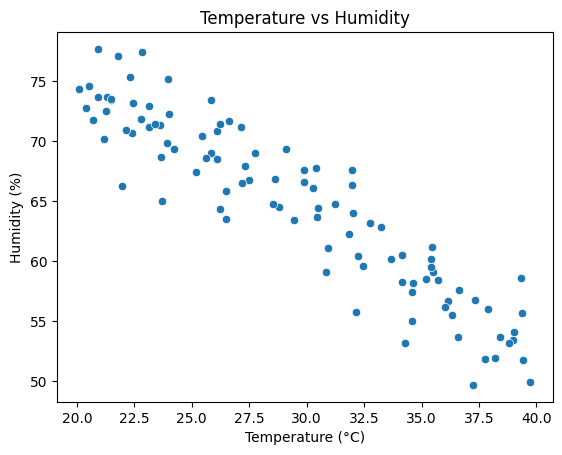

In [22]:
print(data.describe())
print(data.info())

sns.scatterplot(x='Temperature', y='Humidity', data=data)
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data[["Temperature"]]
y = data["Humidity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Intercept: 99.08205056660395
Coefficient: -1.1715239312351375
       Actual  Predicted
14  71.344968  71.391326
74  58.283945  59.089566
15  68.692357  71.354316
4   72.914568  71.995981
32  73.666111  74.127382
59  63.542269  68.028927
91  53.191746  58.939905
10  72.759766  75.169267
50  55.701578  52.933740
53  56.034571  54.685339
75  57.464483  58.570585
16  70.804345  68.523031
54  66.302391  61.642489
39  64.531698  65.338588
12  57.610657  56.147042
22  68.973188  68.806483
99  70.929056  73.123624
24  69.300433  64.965634
71  75.192193  70.995568
49  64.992126  71.320344
40  73.175218  72.792158
60  69.021505  66.544677
28  62.265907  61.771015
64  68.575192  69.069142
81  59.619346  61.047399
41  67.621788  64.049340
3   67.594903  61.624717
7   56.766583  55.356650
94  60.165331  57.587442
83  72.504939  74.162369


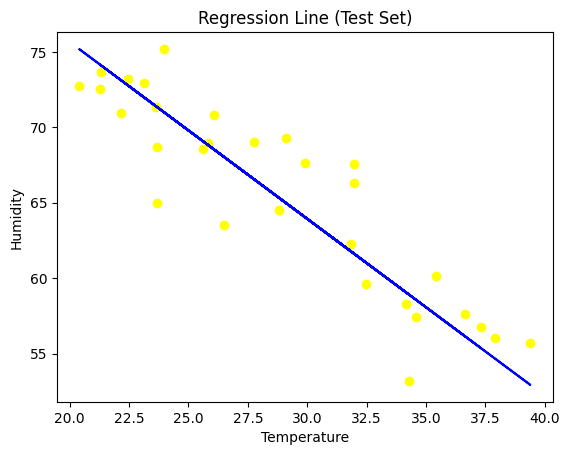

In [26]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

y_pred = model.predict(X_test)

df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_pred)

plt.scatter(X_test, y_test, color='yellow')
plt.plot(X_test, y_pred, color='blue')
plt.title('Regression Line (Test Set)')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()
